In [1]:
import os

if os.path.isdir("../notebooks/"):
    os.chdir("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.rcParams["font.family"] = "serif"

In [3]:
# mock data
from urllib.request import Request, urlopen
import random

url = "https://svnweb.freebsd.org/csrg/share/dict/words?revision=61569&view=co"
req = Request(url, headers={"User-Agent": "Mozilla/5.0"})

web_byte = urlopen(req).read()

webpage = web_byte.decode("utf-8")
random_30_words = random.choices(webpage.split("\n"), k=30)

In [4]:
gender_pairs_words = random_30_words[:10]
gender_pairs_values = np.sort(np.random.randn(10))

random_pairs_words = random_30_words[10:20]
random_pairs_values = np.sort(np.random.randn(10))

shuffled_gender_pairs_words = random_30_words[20:]
shuffled_gender_pairs_values = np.sort(np.random.randn(10))

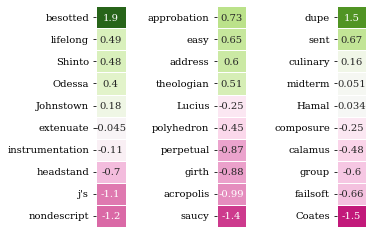

In [5]:
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=6.50127, h=5)
fig.tight_layout(rect=[0, 0, 0.9, 1], pad=6)

all_values = np.concatenate(
    [gender_pairs_values, random_pairs_values, shuffled_gender_pairs_values]
)
vmin, vmax = np.min(all_values), np.max(all_values)

ax1 = sns.heatmap(
    gender_pairs_values[::-1, np.newaxis],
    yticklabels=gender_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax1,
    cbar=False,
    annot=True,
    center=0,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=10)


ax2 = sns.heatmap(
    random_pairs_values[::-1, np.newaxis],
    yticklabels=random_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax2,
    cbar=False,
    annot=True,
    center=0,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=10)

ax3 = sns.heatmap(
    shuffled_gender_pairs_values[::-1, np.newaxis],
    yticklabels=shuffled_gender_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax3,
    cbar=False,
    annot=True,
    center=0,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, fontsize=10)

# f.set_tight_layout(True)
plt.show()

In [6]:
# save to latex
plt.rc("pgf", texsystem="pdflatex")
fig.savefig("images/fig_4.pgf", bbox_inches="tight")